# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create Label

In [2]:
label_df = pd.read_csv('labels.csv')
label_df.head(10)

,filename,format
0,COVID-1,PNG
1,COVID-2,PNG
2,COVID-3,PNG
3,COVID-4,PNG
4,COVID-5,PNG
5,COVID-6,PNG
6,COVID-7,PNG
7,COVID-8,PNG
8,COVID-9,PNG
9,COVID-10,PNG


In [3]:
def create_label_and_folder_series(df):
    label_dict = {
        'COVID':0,
        'Lung_Opacity':1,
        'NORMAL':2,
        'Viral Pneumonia':3
    }
    labels_series = df['filename'].apply(lambda x: label_dict[x.split('-')[0]])
    folders_series = df['filename'].apply(lambda x: x.split('-')[0])
    return labels_series, folders_series

In [4]:
labels_series, folders_series = create_label_and_folder_series(label_df)

In [5]:
labels_series

0        0
1        0
2        0
3        0
4        0
        ..
21160    3
21161    3
21162    3
21163    3
21164    3
Name: filename, Length: 21165, dtype: int64

In [6]:
folders_series

0                  COVID
1                  COVID
2                  COVID
3                  COVID
4                  COVID
              ...       
21160    Viral Pneumonia
21161    Viral Pneumonia
21162    Viral Pneumonia
21163    Viral Pneumonia
21164    Viral Pneumonia
Name: filename, Length: 21165, dtype: object

In [7]:
final_label = label_df.copy()
final_label['folder'] = folders_series
final_label['labels'] = labels_series


In [8]:
final_label.head(10)

,filename,format,folder,labels
0,COVID-1,PNG,COVID,0
1,COVID-2,PNG,COVID,0
2,COVID-3,PNG,COVID,0
3,COVID-4,PNG,COVID,0
4,COVID-5,PNG,COVID,0
5,COVID-6,PNG,COVID,0
6,COVID-7,PNG,COVID,0
7,COVID-8,PNG,COVID,0
8,COVID-9,PNG,COVID,0
9,COVID-10,PNG,COVID,0


# Check Data Distribution

In [9]:
label_dict = {
        0:'COVID',
        1:'Lung_Opacity',
        2:'NORMAL',
        3:'Viral Pneumonia'
    }
eda_df = pd.DataFrame({
'filename':final_label.filename.values,
'labels':final_label.labels.values})
eda_df.labels = eda_df['labels'].apply(lambda x: label_dict[x])
eda_df.head(10)

,filename,labels
0,COVID-1,COVID
1,COVID-2,COVID
2,COVID-3,COVID
3,COVID-4,COVID
4,COVID-5,COVID
5,COVID-6,COVID
6,COVID-7,COVID
7,COVID-8,COVID
8,COVID-9,COVID
9,COVID-10,COVID


In [10]:
eda_df.groupby('labels').count()

,filename
labels,
COVID,3616
Lung_Opacity,6012
NORMAL,10192
Viral Pneumonia,1345


Text(0, 0.5, 'Count')

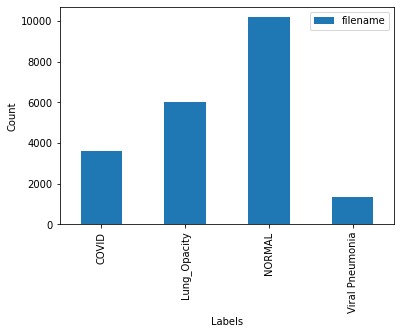

In [11]:

eda_df.groupby('labels').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

# Split Data

In [12]:
train_df, valid_df = train_test_split(final_label, test_size=0.4, random_state=42)

In [13]:
train_df.groupby('labels').count()

,filename,format,folder
labels,,,
0,2179,2179,2179
1,3561,3561,3561
2,6134,6134,6134
3,825,825,825


In [14]:
valid_df.groupby('labels').count()

,filename,format,folder
labels,,,
0,1437,1437,1437
1,2451,2451,2451
2,4058,4058,4058
3,520,520,520


## Split Validation into Valid and Benchmark.

Benchmark Dataset will contains 100 images for each classes to meets balanced data distribution.

In [15]:
valid_df.labels[0]==0

True

In [16]:
covid_df = valid_df[valid_df['labels'] == 0]

In [17]:
lung_opc_df = valid_df[valid_df['labels'] == 1]
normal_df = valid_df[valid_df['labels']==2]
v_pneumonia_df = valid_df[valid_df['labels']==3]

In [29]:
benchmark_df = pd.concat((
                    covid_df.head(50), covid_df.tail(50),
                    normal_df.head(50), normal_df.tail(50),
                    v_pneumonia_df.head(50), v_pneumonia_df.tail(50),
                    lung_opc_df.head(50), lung_opc_df.tail(50),
                    ))

In [30]:
benchmark_df.index

Int64Index([2127, 3125, 2929,  971, 1371,  856, 2238, 2300, 1290,  408,
            ...
            4592, 7161, 7897, 6260, 8142, 4589, 4130, 6827, 6321, 6055],
           dtype='int64', length=400)

In [31]:
len(benchmark_df)

400

In [32]:
valid_df = valid_df.drop(index=benchmark_df.index)

In [33]:
valid_df

,filename,format,folder,labels
9693,NORMAL-66,PNG,NORMAL,2
11741,NORMAL-2114,PNG,NORMAL,2
14218,NORMAL-4591,PNG,NORMAL,2
19109,NORMAL-9482,PNG,NORMAL,2
17847,NORMAL-8220,PNG,NORMAL,2
...,...,...,...,...
19090,NORMAL-9463,PNG,NORMAL,2
14618,NORMAL-4991,PNG,NORMAL,2
11456,NORMAL-1829,PNG,NORMAL,2
13369,NORMAL-3742,PNG,NORMAL,2


Text(0, 0.5, 'Count')

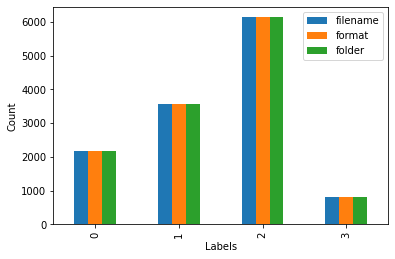

In [39]:
train_df.groupby('labels').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

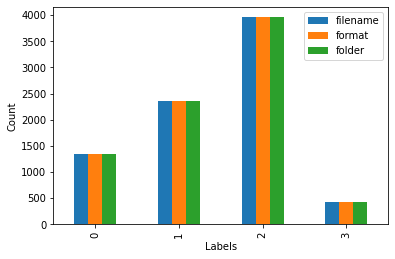

In [40]:
valid_df.groupby('labels').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

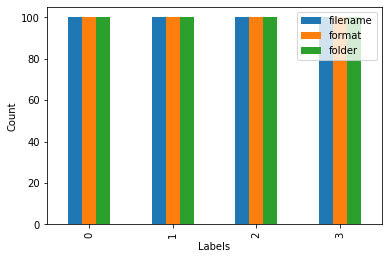

In [41]:
benchmark_df.groupby('labels').count().plot.bar()
plt.xlabel('Labels')
plt.ylabel('Count')

# Save

In [42]:
train_df.to_csv("train.csv", index=False)
valid_df.to_csv("val.csv", index=False)
benchmark_df.to_csv("test.csv", index=False)